 # Ch.4 분류

 ### Logistic Regression

In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
# data, target, feature_names, feature_names, DESCR
data = iris.data
label = iris.target
columns = iris.feature_names
df = pd.DataFrame(data, columns=columns)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
    train_test_split(data, label, test_size=0.2,
                shuffle=True, stratify=label, random_state=2019)

 - 모델생성

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(verbose=1)

 - 모델 학습

In [8]:
lr.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

- 예측(결과 확인)

In [9]:
y_pred = lr.predict(x_test)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9666666666666667

In [11]:
# 계수(weights)
lr.coef_

array([[-0.4331758 ,  0.82135237, -2.39403865, -0.96776796],
       [ 0.49039201, -0.29955397, -0.15924469, -0.91532022],
       [-0.05721621, -0.5217984 ,  2.55328334,  1.88308818]])

In [12]:
# 절편(bias)
lr.intercept_

array([  9.79503679,   2.02943481, -11.8244716 ])

 ### Support Vector machine

In [13]:
from sklearn.svm import SVC
#모델 객체 생성
svc = SVC()
svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
#학습
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
#결과예측
y_pred = svc.predict(x_test)
y_pred

array([1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 0, 1, 0, 0, 2, 2,
       1, 0, 1, 2, 1, 2, 1, 2])

In [16]:
#정확도
accuracy_score(y_test, y_pred)

0.9666666666666667

 ### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
dtc.fit(x_train,y_train)
dtc.fit

<bound method DecisionTreeClassifier.fit of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')>

In [19]:
y_pred = dtc.predict(x_test)
y_pred

array([1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 0, 1, 0, 0, 2, 2,
       1, 0, 1, 2, 1, 2, 1, 2])

In [20]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [21]:
from sklearn.tree import export_graphviz
iris_data = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2,random_state=11)
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(x_train, y_train)
#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,\
               feature_names = iris_data.feature_names, impurity=True, filled=True)

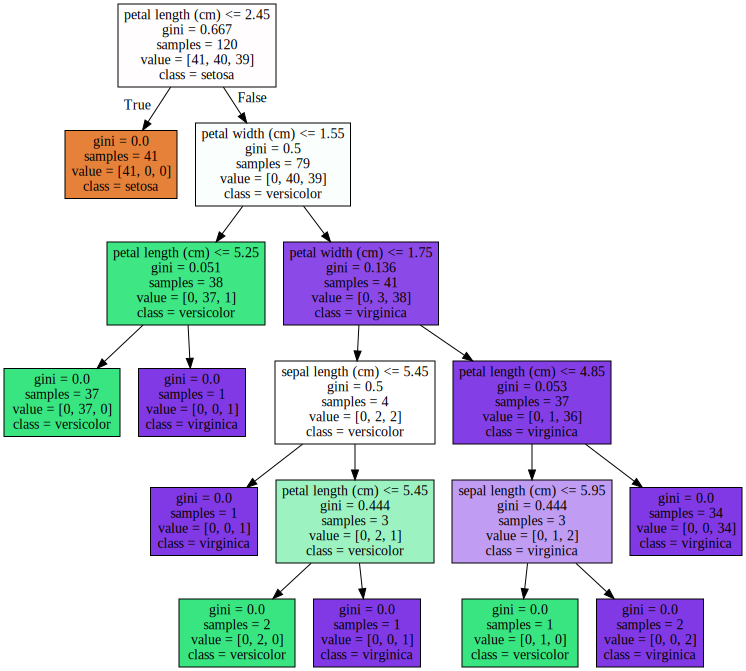

In [22]:
import graphviz
#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [23]:
y_pred = dt_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

 ### 제약조건
  - max_depth = 3

In [24]:
dt_clf2 = DecisionTreeClassifier(max_depth=3, random_state=156)
dt_clf2.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

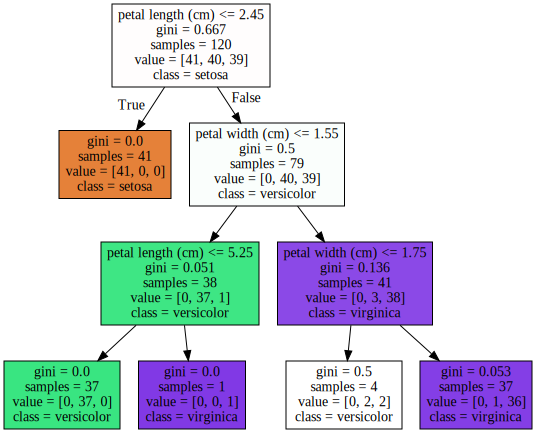

In [25]:
export_graphviz(dt_clf2, out_file="tree.dot", class_names=iris_data.target_names,\
               feature_names = iris_data.feature_names, impurity=True, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [26]:
y_pred = dt_clf2.predict(x_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

 - min_samples_split = 4인 경우

In [27]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=4, random_state=156)
dt_clf3.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

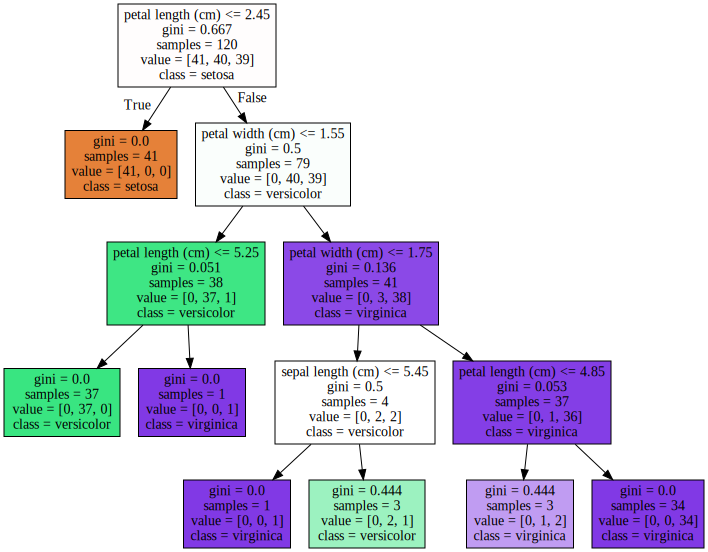

In [28]:
export_graphviz(dt_clf3, out_file="tree.dot", class_names=iris_data.target_names,\
               feature_names = iris_data.feature_names, impurity=True, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [29]:
y_pred = dt_clf3.predict(x_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

 - min_samples_leaf = 4 인 경우

In [30]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf=4, random_state=156)
dt_clf4.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

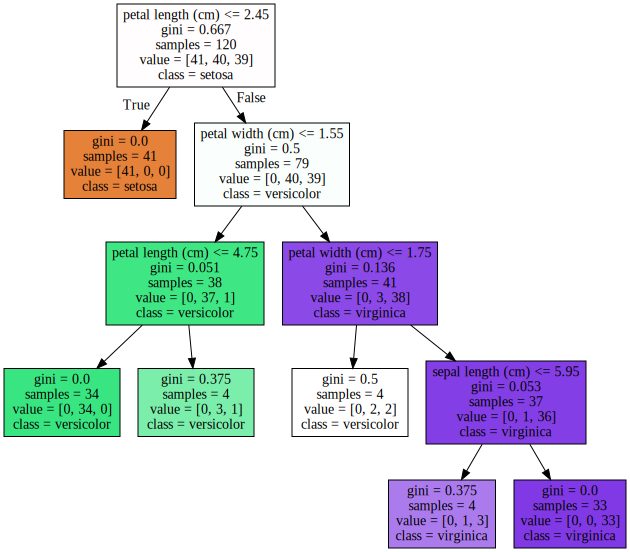

In [31]:
export_graphviz(dt_clf4, out_file="tree.dot", class_names=iris_data.target_names,\
               feature_names = iris_data.feature_names, impurity=True, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [32]:
y_pred = dt_clf4.predict(x_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

 ### Feature 중요도

In [33]:
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [34]:
# feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


In [35]:
df = pd.DataFrame({'name': iris_data.feature_names, '제약 무':dt_clf.feature_importances_,
                  'max_depth = 3':dt_clf2.feature_importances_,
                  'min_samples_split = 4' :dt_clf3.feature_importances_,
                  'min_samples_leaf=4' : dt_clf4.feature_importances_})
df

,name,제약 무,max_depth = 3,min_samples_split = 4,min_samples_leaf=4
0,sepal length (cm),0.025005,0.000000,0.008623,0.005947
1,sepal width (cm),0.000000,0.000000,0.000000,0.000000
2,petal length (cm),0.554903,0.558107,0.556796,0.545948
3,petal width (cm),0.420092,0.441893,0.434581,0.448104


### 앙상블 학습

In [36]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [37]:
#개별 모델은 로지스틱 회귀와 KNN임.
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier( estimators=[('LR', lr_clf), ('KNN', knn_clf)],voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size=0.2, random_state=156)

#VotingCalssifier 학습/예측/평가.
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))
#개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test,pred)))

voting 분류기 정확도 : 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


 ### Random Forest

In [38]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name',
                                                              'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                if x[1] > 0 else x[0] , axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [39]:
def get_human_dataset():
    #각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                    header=None, names=['column_index', 'column_name'])
    #중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    #DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    #학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로디으 칼럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
    #학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+', header=None, names=['action'])
    
    # 로드된 학습.테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

#X_train, X_test, y_train, y_test = get_human_dataset()

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
#import warnings
#warnigs.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

#GBM 수행시간 측정을 위함. 시작 시간 설정.
#start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0,verbose=1)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
#print("GBM 수행 시간:{ 0:.1f} 초".format(time.time() - start_time))

      Iter       Train Loss   Remaining Time 
         1       10340.3113            6.61m
         2        8582.2920            7.04m
         3        7283.1605            7.11m
         4        6276.5356            7.10m
         5        5457.5371            7.06m
         6        4785.1275            7.01m
         7        4227.2374            6.95m
         8        3736.9844            6.89m
         9        3350.6008            6.83m
        10        3000.1676            6.77m
        20        1220.7822            6.04m
        30         618.1201            5.29m
        40         378.4007            4.57m
        50         262.6745            3.83m
        60         190.7980            3.06m
        70         146.5356            2.29m
        80         116.6210            1.51m
        90          93.9275           44.57s
       100          77.9308            0.00s
GBM 정확도: 0.9382


In [42]:
gb_clf

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=1,
                           warm_start=False)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


#결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DAtaFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

 ### 4.6 XGBoost(eXtra Gradient Boost)

In [2]:
import xgboost as xgb
from xgboost import XGBClassifier

In [1]:
import xgboost
xgboost.__version__

'0.90'

 -lightgbm

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
            verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

In [ ]:
from sklearn.moel_selection import GridSearchCV

#하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 200으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64],
         'max_depth':[128,160],
         'min_child_samples':[60,100],
         'subsample':[0.8,1]}

#cv는 3으로 지정
gridcv = GridSearchCV(lgbm_clf,param_grid=rarams, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
          eval_set=[(X_train, y_train), (X_test,y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average = 'macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))